<a href="https://colab.research.google.com/github/Towhid-Alam/Big-Data/blob/main/20_Lab_Evaluation_2(Part_1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.metrics import r2_score
from sklearn.metrics import r2_score,mean_squared_error

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/DATA (1).csv')

In [3]:
df

,STUDENT ID,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,STUDENT141,2,1,2,3,1,1,2,1,1,...,1,1,2,1,2,1,3,3,9,5
141,STUDENT142,1,1,2,4,2,2,2,1,4,...,1,1,3,2,2,1,5,3,9,5
142,STUDENT143,1,1,1,4,2,2,2,1,1,...,1,1,3,3,2,1,4,3,9,1
143,STUDENT144,2,1,2,4,1,1,1,5,2,...,2,1,2,1,2,1,5,3,9,4


In [4]:
X = df.iloc[:,1:-1]
y = df.iloc[:,-1]

In [5]:
X

,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,COURSE ID
0,2,2,3,3,1,2,2,1,1,1,...,1,1,1,3,2,1,2,1,1,1
1,2,2,3,3,1,2,2,1,1,1,...,1,1,1,3,2,3,2,2,3,1
2,2,2,2,3,2,2,2,2,4,2,...,1,1,1,2,2,1,1,2,2,1
3,1,1,1,3,1,2,1,2,1,2,...,1,1,2,3,2,2,1,3,2,1
4,2,2,1,3,2,2,1,3,1,4,...,1,2,1,2,2,2,1,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,2,1,2,3,1,1,2,1,1,2,...,1,1,1,2,1,2,1,3,3,9
141,1,1,2,4,2,2,2,1,4,2,...,2,1,1,3,2,2,1,5,3,9
142,1,1,1,4,2,2,2,1,1,1,...,1,1,1,3,3,2,1,4,3,9
143,2,1,2,4,1,1,1,5,2,3,...,1,2,1,2,1,2,1,5,3,9


In [6]:
y

0      1
1      1
2      1
3      1
4      1
      ..
140    5
141    5
142    1
143    4
144    3
Name: GRADE, Length: 145, dtype: int64

In [7]:
X_scaled = StandardScaler().fit_transform(X)

In [8]:
X_scaled

array([[ 0.62076591,  0.81649658,  1.97095572, ..., -1.63825152,
        -1.88766626, -0.96372631],
       [ 0.62076591,  0.81649658,  1.97095572, ..., -0.86699675,
         0.3020266 , -0.96372631],
       [ 0.62076591,  0.81649658,  0.10305651, ..., -0.86699675,
        -0.79281983, -0.96372631],
       ...,
       [-1.01579877, -1.22474487, -1.7648427 , ...,  0.6755128 ,
         0.3020266 ,  1.4986581 ],
       [ 0.62076591, -1.22474487,  0.10305651, ...,  1.44676758,
         0.3020266 ,  1.4986581 ],
       [-1.01579877, -1.22474487, -1.7648427 , ...,  1.44676758,
         1.39687304,  1.4986581 ]])

# **PCA**

In [9]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X_pca = pd.DataFrame(X_pca, columns = ['PC1', 'PC2'])
X_pca

,PC1,PC2
0,-1.571437,0.869647
1,-1.796244,0.345732
2,-0.228263,2.939621
3,-0.241692,-0.548425
4,0.678129,3.080422
...,...,...
140,0.615431,-1.642666
141,1.019946,-1.360621
142,0.658301,-0.587089
143,2.607119,1.033745


In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_pca,y,test_size=0.1)

In [11]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print(accuracy_score(y_test,y_pred))


0.06666666666666667


 # Visualization of PCA

In [12]:
finalDf = pd.concat([X_pca, df[['GRADE']]], axis = 1)

In [13]:
X = finalDf.iloc[:,1:-1]
y = finalDf.iloc[:,-1]


In [14]:
X_train.shape

(130, 2)

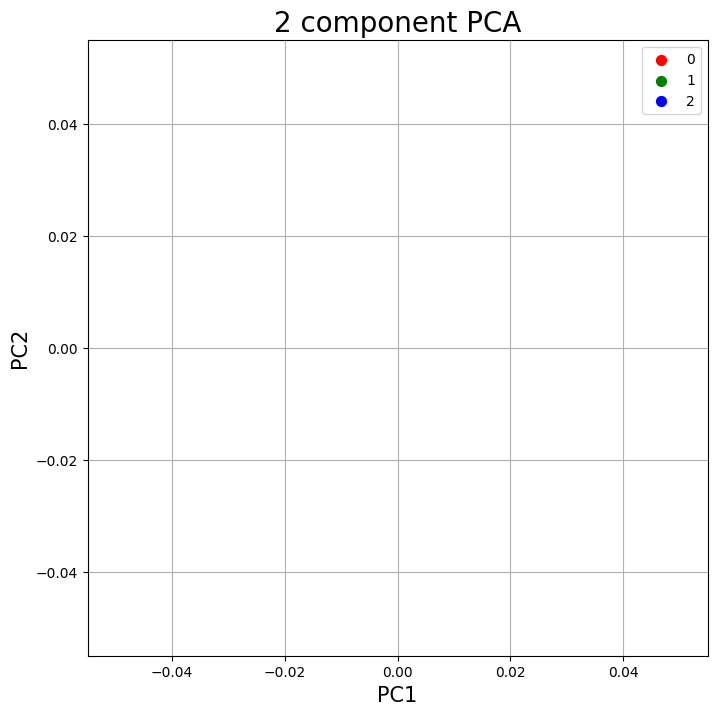

In [15]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = ['0', '1', '2','3', '4', '5', '6', '7']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['GRADE'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [16]:
rf = RandomForestClassifier()

# GridSearchCV

In [17]:
# Number of trees in random forest
n_estimators = [20,60,100,120]

# Number of features to consider at every split
max_features = [0.2,0.6,1.0]

# Maximum number of levels in tree
max_depth = [2,8,None]

# Number of samples
max_samples = [0.5,0.75,1.0]

# 108 diff random forest train


In [18]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
              'max_samples':max_samples
             }
print(param_grid)

{'n_estimators': [20, 60, 100, 120], 'max_features': [0.2, 0.6, 1.0], 'max_depth': [2, 8, None], 'max_samples': [0.5, 0.75, 1.0]}


In [19]:
from sklearn.model_selection import GridSearchCV

rf_grid = GridSearchCV(estimator = rf,
                       param_grid = param_grid,
                       cv = 5,
                       verbose=2,
                       n_jobs = -1)

In [20]:
rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 8, None],
                         'max_features': [0.2, 0.6, 1.0],
                         'max_samples': [0.5, 0.75, 1.0],
                         'n_estimators': [20, 60, 100, 120]},
             verbose=2)

In [ ]:
rf_grid.best_params_

{'max_depth': 2, 'max_features': 1.0, 'max_samples': 0.5, 'n_estimators': 60}

In [ ]:
rf_grid.best_score_

0.27692307692307694

# Regularization

# Linear Regression

In [21]:
# Linear Regression
reg = LinearRegression()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)

In [22]:
print(reg.coef_)
print(reg.intercept_)

print("R2 score",r2_score(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

[-0.15350128 -0.2353495 ]
3.2341763937517696
R2 score 0.11134271085839875
RMSE 2.078665249433889


 # Lasso (L1)

In [23]:
# Lasso
reg = Lasso(alpha=0.01)
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)

In [24]:
print(reg.coef_)
print(reg.intercept_)

print("R2 score",r2_score(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

[-0.15019535 -0.23161148]
3.2339644051040937
R2 score 0.11041367270632763
RMSE 2.079751525820415


 # ElasticNet

In [25]:
# ElasticNet
reg = ElasticNet(alpha=0.005,l1_ratio=0.9)
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
r2_score(y_test,y_pred)

0.11092176689590716

In [26]:
print(reg.coef_)
print(reg.intercept_)

print("R2 score",r2_score(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

[-0.15198778 -0.23362443]
3.234079062920405
R2 score 0.11092176689590716
RMSE 2.079157507812429


# Polynomial Ridge Regression

In [27]:
X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200, 1)

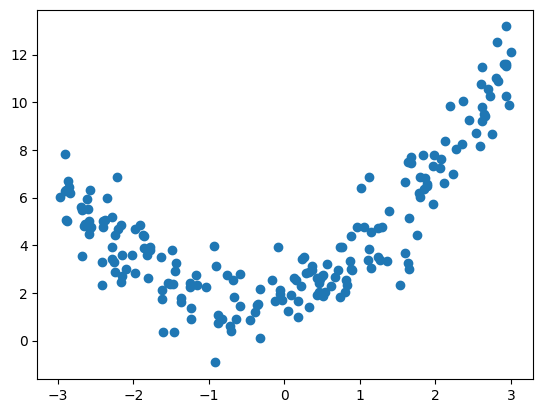

In [28]:
plt.scatter(X, y)
plt.show()